In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate

In [6]:
data = pd.read_csv('../Dataset Creation/synthetic_heart_attack_data_balanced.csv')

In [11]:
# Display dataset overview
print("Dataset Overview:")
print(tabulate(data.head(), headers="keys", tablefmt="pretty"))

Dataset Overview:
+---+-------------------+-------------------+----------------------+-------------------+-------------------+---------------+-------------------+
|   |     HR (BPM)      |     SpO2 (%)      | Pulse Amplitude (AU) |     PRV (ms)      | Temperature (°C)  | Device Status | Heart Attack Risk |
+---+-------------------+-------------------+----------------------+-------------------+-------------------+---------------+-------------------+
| 0 | 61.5993493283918  | 98.4395241666879  |  0.982514250706222   | 89.98825126636112 | 38.38639687359888 |    Offline    |        nan        |
| 1 | 83.81280124446076 | 92.13731798311092 |  0.7709199456895137  | 64.85227930156564 | 37.87607612643286 |    Offline    |        nan        |
| 2 | 61.87781428591252 | 93.8409061149125  |  0.5183659687133069  | 97.43621577899954 | 37.9786170873819  |    Online     |        No         |
| 3 | 93.85782878895483 | 92.3086039570316  |  0.674269267394926   | 85.9297700377967  | 38.33881586644792 |    

In [14]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HR (BPM)              49999 non-null  float64
 1   SpO2 (%)              49999 non-null  float64
 2   Pulse Amplitude (AU)  49999 non-null  float64
 3   PRV (ms)              49999 non-null  float64
 4   Temperature (°C)      49999 non-null  float64
 5   Device Status         49999 non-null  object 
 6   Heart Attack Risk     30500 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.7+ MB
None


In [13]:
# Display summary statistics
print("\nSummary Statistics:")
summary_stats = data.describe()
print(tabulate(summary_stats, headers="keys", tablefmt="pretty"))


Summary Statistics:
+-------+-------------------+-------------------+----------------------+--------------------+--------------------+
|       |     HR (BPM)      |     SpO2 (%)      | Pulse Amplitude (AU) |      PRV (ms)      |  Temperature (°C)  |
+-------+-------------------+-------------------+----------------------+--------------------+--------------------+
| count |      49999.0      |      49999.0      |       49999.0        |      49999.0       |      49999.0       |
| mean  | 84.06803237172782 | 94.19713439550821 |  0.7501684520298938  | 61.958442469414926 | 37.32184343484651  |
|  std  | 11.41928441164388 | 2.766843728408499 |  0.1439369705462473  | 18.527653931346872 | 0.8688419835789682 |
|  min  | 60.00022146702952 | 90.00008432211304 |  0.5000078829452037  | 40.00246988267487  | 35.50008258973298  |
|  25%  | 74.85631901921059 |  91.906118916281  |  0.6257032634889756  | 45.763151381829076 | 36.60997339027456  |
|  50%  | 87.08425464785114 | 93.78337625649591 |  0.750487

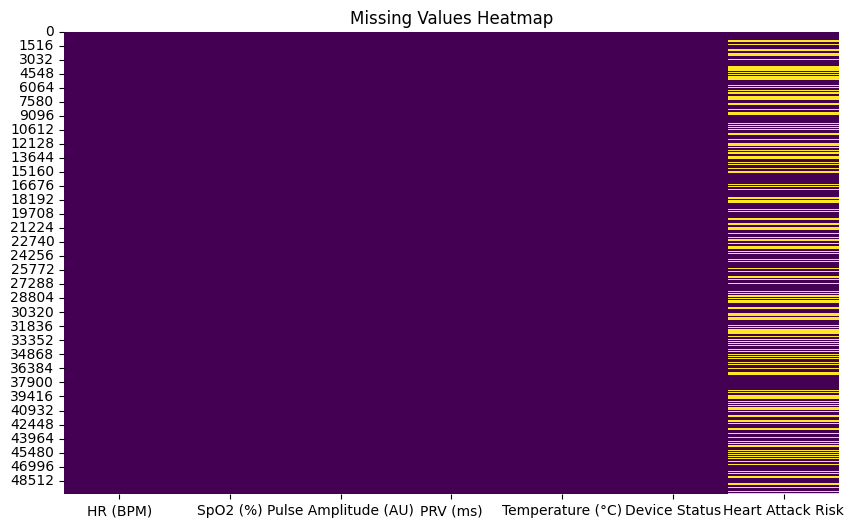

In [15]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
print("\nDuplicate Rows:", data.duplicated().sum())
data = data.drop_duplicates()


Duplicate Rows: 0


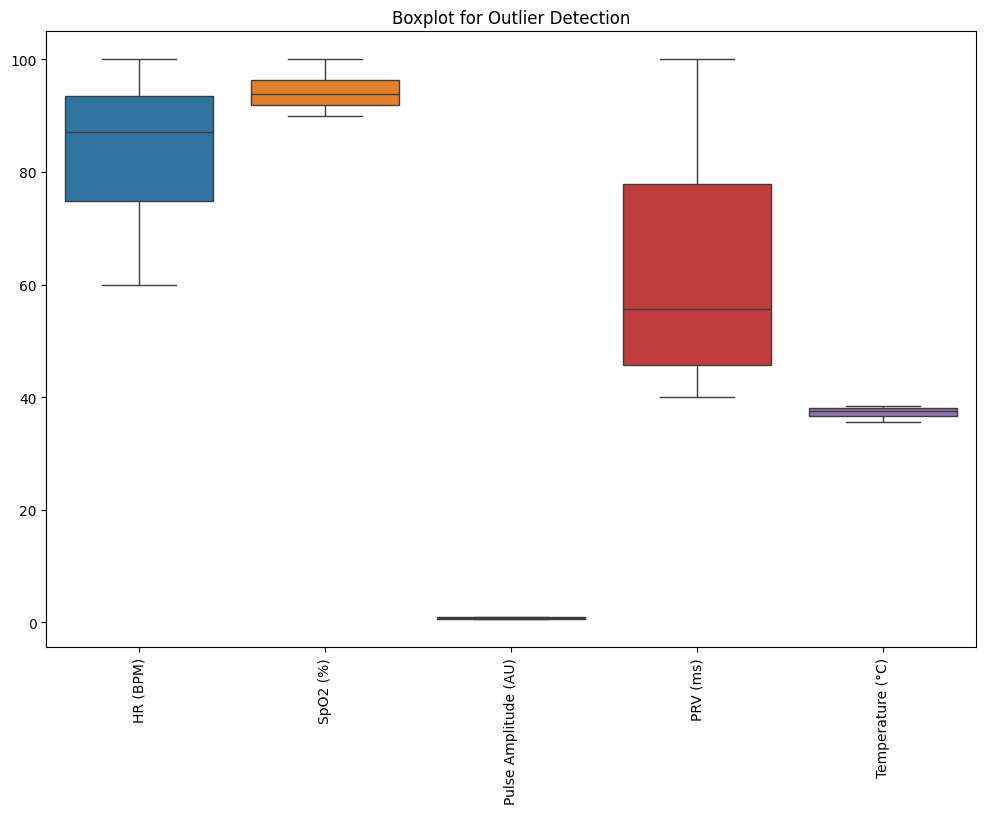

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

In [19]:
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

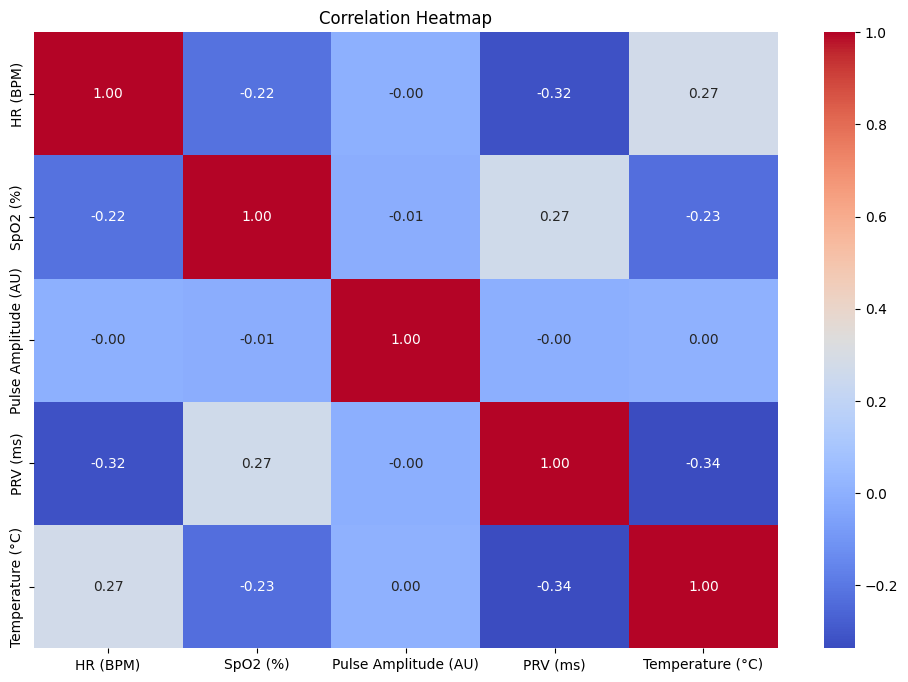

In [26]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Check if there are enough numeric columns
if numeric_data.shape[1] >= 2:
    # Compute correlation and plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric data for correlation heatmap.")